<h1>

PROJECT - 20 CRIME DATA PROJECT

</h2>

In [2]:
import pandas as pd


In [38]:
df=pd.read_csv("10_Property_stolen_and_recovered.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x) #I am using this line of code for removing exponential value
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [39]:
#Checking datatypes of the columns present in the dataset
df.dtypes

Area_Name                      object
Year                            int64
Group_Name                     object
Sub_Group_Name                 object
Cases_Property_Recovered        int64
Cases_Property_Stolen           int64
Value_of_Property_Recovered     int64
Value_of_Property_Stolen        int64
dtype: object

<h3>
EXPLORATORY DATA ANALYSIS
</h3>

In [40]:
#Checking is there any missing value present in the dataset
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

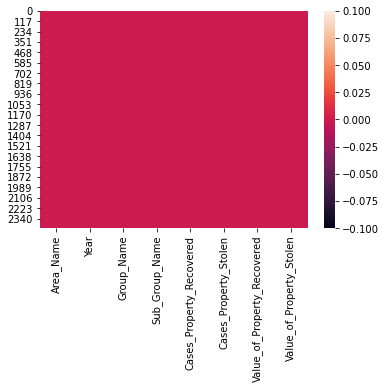

In [42]:
#Checking missing value by ploting heatmap

sns.heatmap(df.isnull())

In [43]:
#Want to see the information of dataset like datatype, null value of all columns attribute at one place

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Name                    2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [44]:
#checking shape of the dataset to know that how many  columns and rows present.
df.shape

(2449, 8)

In [45]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [46]:
#I have to transform non numerical value in the numerical value to see corelation and statistical information across all columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Area_Name'] = le.fit_transform(df['Area_Name'])
df['Group_Name'] = le.fit_transform(df['Group_Name'])
df['Sub_Group_Name'] = le.fit_transform(df['Sub_Group_Name'])
df.head(7)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,0,2001,0,2,27,64,755858,1321961
1,1,2001,0,2,3321,7134,51483437,147019348
2,2,2001,0,2,66,248,825115,4931904
3,3,2001,0,2,539,2423,3722850,21466955
4,4,2001,0,2,367,3231,2327135,17023937
5,5,2001,0,2,119,364,1804823,10217378
6,6,2001,0,2,1169,4144,6518261,30457033


In [47]:
df['Value_of_Property_Recovered'] = df['Value_of_Property_Recovered'].astype('int64')
df['Value_of_Property_Stolen'] = df['Value_of_Property_Stolen'].astype('int64')

In [48]:
df.dtypes

Area_Name                      int32
Year                           int64
Group_Name                     int32
Sub_Group_Name                 int32
Cases_Property_Recovered       int64
Cases_Property_Stolen          int64
Value_of_Property_Recovered    int64
Value_of_Property_Stolen       int64
dtype: object

In [49]:
#Checking Statistical information like Mean, Median, STD, Min, MAx etc of datasets for findding observation:-

df.describe()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
count,2449.000,2449.000,2449.000,2449.000,2449.000,2449.000,2449.000,2449.000
mean,17.000,2005.499,2.999,2.999,1232.892,3419.421,58599240.759,246543094.390
std,10.104,2.873,2.000,2.000,3079.574,8136.257,249440298.716,967003498.265
min,0.000,2001.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.000,2003.000,1.000,1.000,13.000,45.000,684570.000,3649018.000
50%,17.000,2005.000,3.000,3.000,113.000,358.000,5851830.000,27018001.000
75%,26.000,2008.000,5.000,5.000,722.000,1875.000,34063947.000,121457955.000
max,34.000,2010.000,6.000,6.000,27960.000,80663.000,7470011363.000,23776254525.000


In [52]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

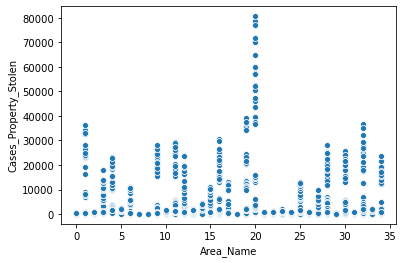

In [53]:
sns.scatterplot(x="Area_Name",y="Cases_Property_Stolen",data=df)

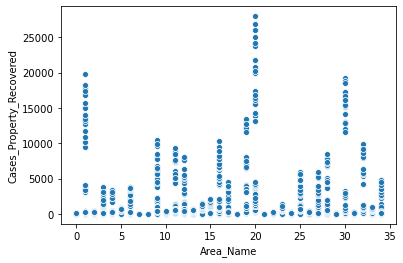

In [58]:
sns.scatterplot(x="Area_Name",y="Cases_Property_Recovered",data=df)

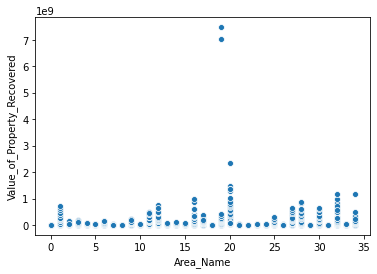

In [59]:
sns.scatterplot(x="Area_Name",y="Value_of_Property_Recovered",data=df)

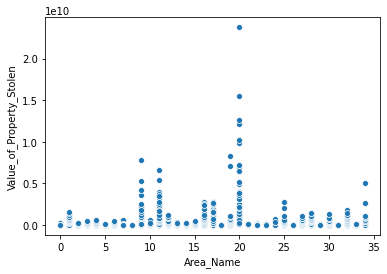

In [60]:
sns.scatterplot(x="Area_Name",y="Value_of_Property_Stolen",data=df)

In [63]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

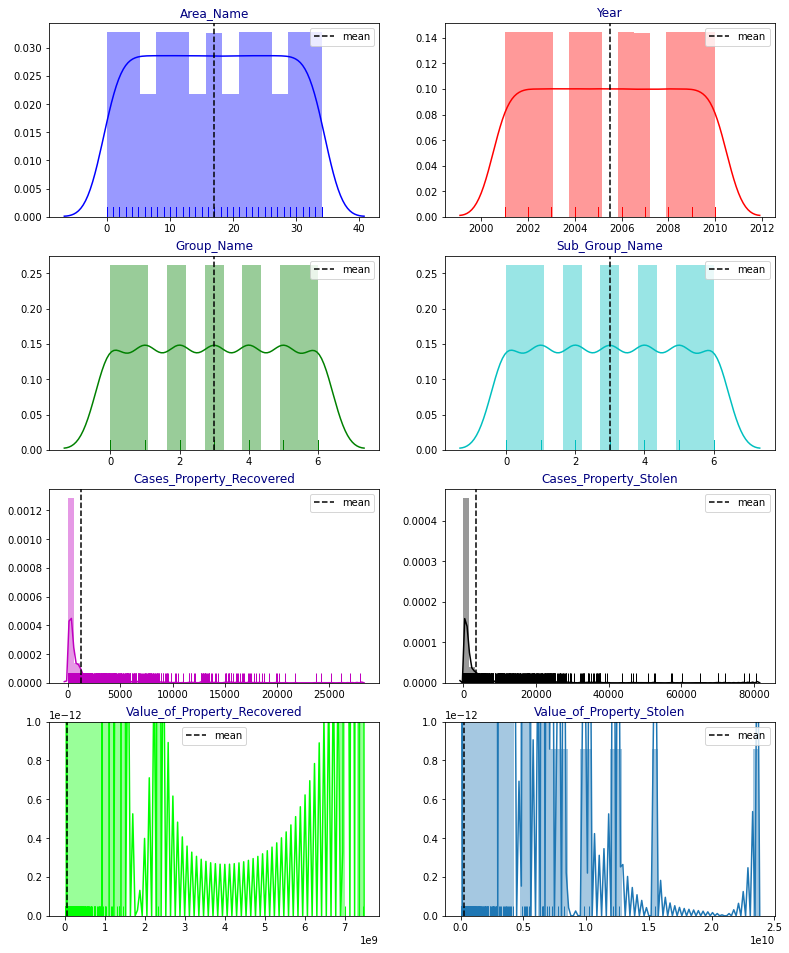

In [62]:
import warnings
warnings.filterwarnings('ignore')
import itertools

cols = ['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen']
length = len(cols)

cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E897B8C280>,
      dtype=object)

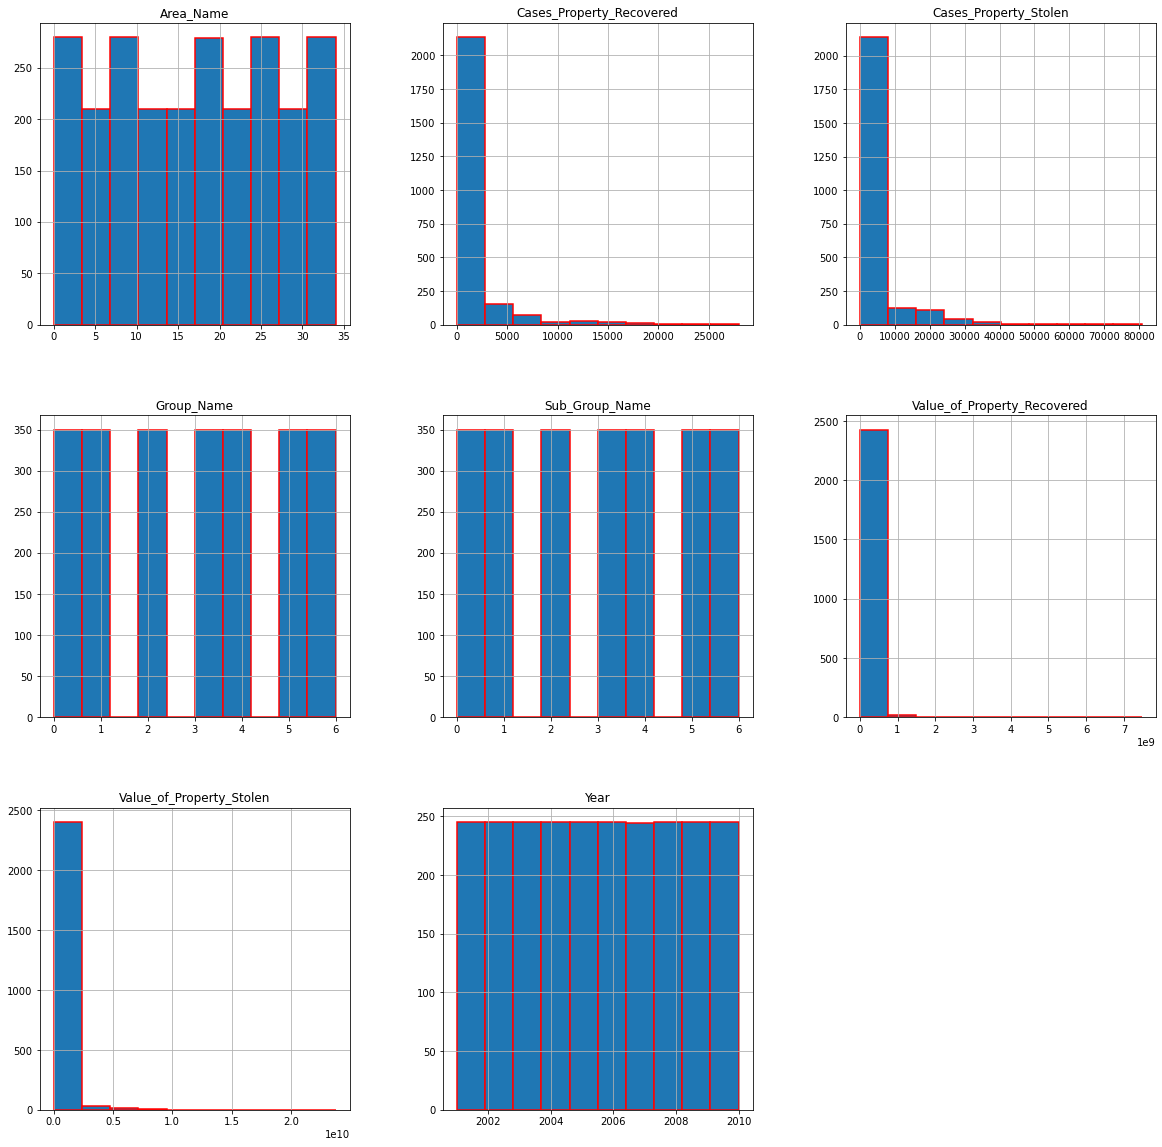

In [64]:
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [65]:
dfcor = df.corr()
dfcor

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
Area_Name,1.000,-0.000,-0.000,-0.000,0.037,0.018,0.067,0.018
Year,-0.000,1.000,-0.000,-0.000,0.022,0.029,0.099,0.101
Group_Name,-0.000,-0.000,1.000,0.392,0.374,0.384,0.193,0.187
Sub_Group_Name,-0.000,-0.000,0.392,1.000,0.280,0.293,0.152,0.213
Cases_Property_Recovered,0.037,0.022,0.374,0.280,1.000,0.936,0.496,0.579
Cases_Property_Stolen,0.018,0.029,0.384,0.293,0.936,1.000,0.509,0.643
Value_of_Property_Recovered,0.067,0.099,0.193,0.152,0.496,0.509,1.000,0.581
Value_of_Property_Stolen,0.018,0.101,0.187,0.213,0.579,0.643,0.581,1.000


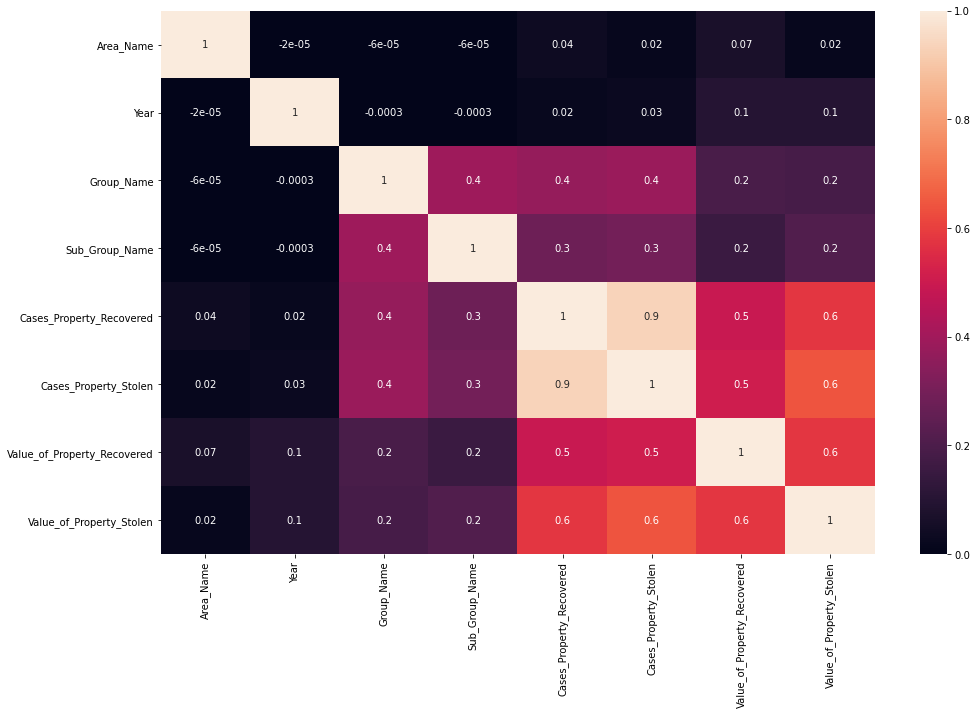

In [70]:
plt.figure(figsize=(16,10))
sns.heatmap(dfcor,annot=True,fmt='.1g')

In [71]:
collist = df.columns.values
ncol=12
nrows=10


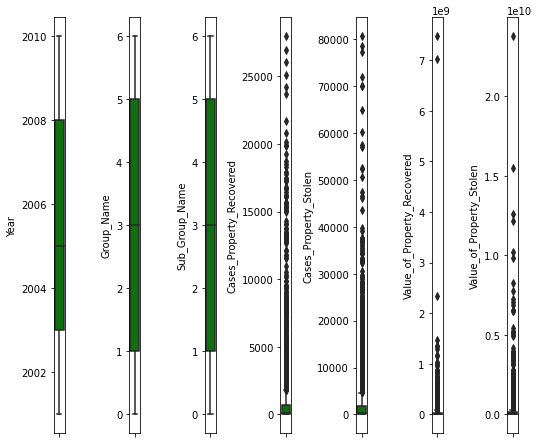

In [72]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color ='green',orient='v')
    plt.tight_layout()


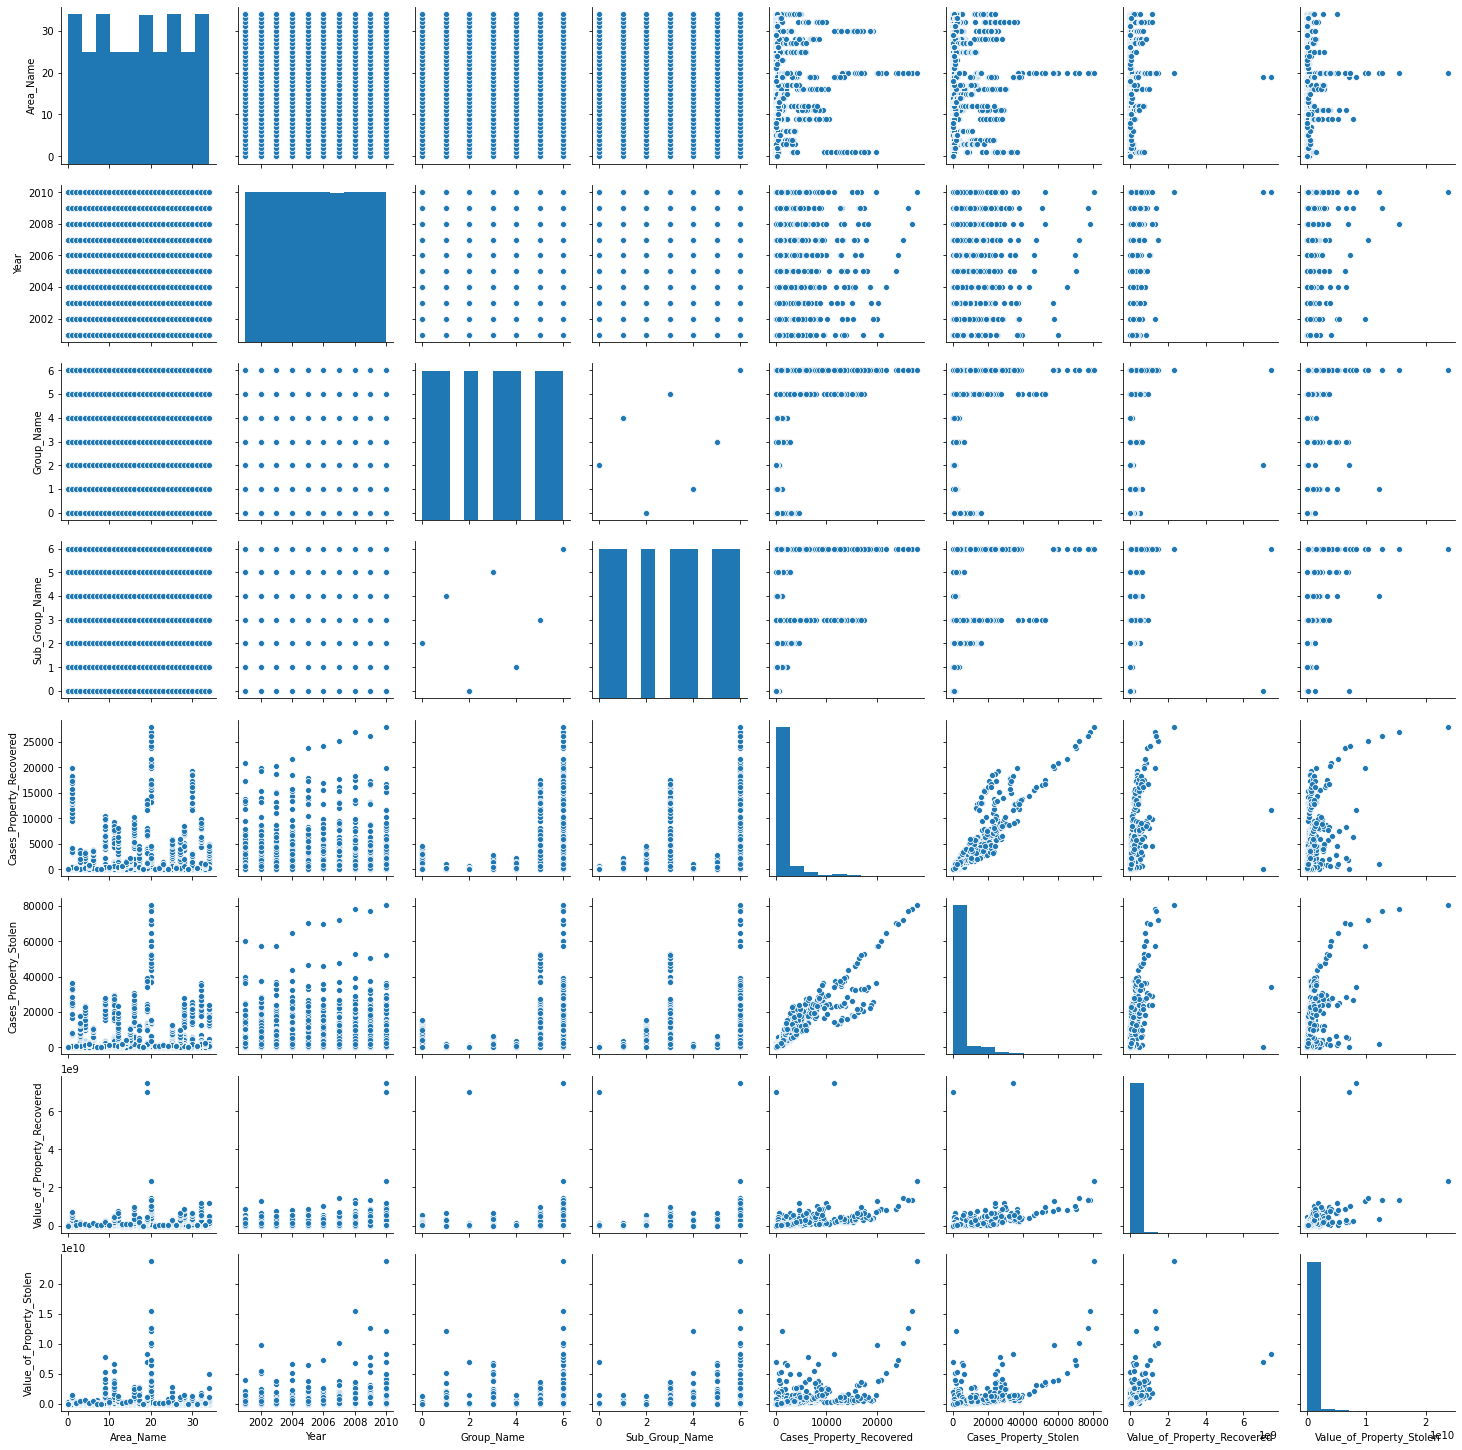

In [74]:
sns.pairplot(df)

In [75]:
#Checking Skewness Present in the dataset
df.skew()

Area_Name                      0.000
Year                           0.001
Group_Name                     0.000
Sub_Group_Name                 0.000
Cases_Property_Recovered       4.181
Cases_Property_Stolen          4.124
Value_of_Property_Recovered   20.651
Value_of_Property_Stolen      11.875
dtype: float64

# END OF PROJECT